In [253]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation
from keras.preprocessing import sequence
from keras.datasets import imdb
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
# fix random seed for reproducibility
numpy.random.seed(7)

In [254]:
df = pd.read_csv("filtered_labelled_features.csv")
df = df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1)
df.head()

,sequence,sid,pos_acts_toeachother,neg_acts_toeachother,pos_acts_together,neg_acts_together,pos_char1_acts,neg_char1_acts,pos_char2_acts,neg_char2_acts,...,neg,filename,unique_ID,29:posFramesFired,30:negFramesFired,31:otherFramesFired,32:posFramewrtCharFired,33:negFramewrtCharFired,34:otherFrameswrtCharFired,manualLabel
0,1,s0,0,0,0,0,0,0,0,1,...,1,aeschylus.libation.0.3.sent,aeschylus.libation.0.3.sents0,2,2,1,1,2,1,p
1,1,s9,0,0,0,0,0,0,0,0,...,0,aeschylus.libation.0.3.sent,aeschylus.libation.0.3.sents9,1,1,0,0,0,0,p
2,1,s10,0,0,0,0,0,0,1,0,...,0,aeschylus.libation.0.3.sent,aeschylus.libation.0.3.sents10,2,1,0,0,0,0,p
3,1,s12,0,0,0,0,0,0,0,0,...,0,aeschylus.libation.0.3.sent,aeschylus.libation.0.3.sents12,0,1,0,0,0,0,p
4,1,s13,0,0,0,0,0,0,0,0,...,2,aeschylus.libation.0.3.sent,aeschylus.libation.0.3.sents13,0,0,0,0,0,0,p


In [255]:
y = df[['manualLabel', 'sequence', 'sid']]
x = df.drop(['manualLabel', 'filename', 'unique_ID'], axis=1)

In [256]:
sequences_output = []
output = [[] for i in range(100)]
for index, row in y.iterrows():
    for s in range(1, 101):
        if row['manualLabel'] == 'p':
            label = 1
        elif row['manualLabel'] == 'n':
            label = 0
        if row['sequence'] == s:
            if s in sequences_output:
                i = sequences_output.index(s)
                output[i].append(label)
            else:
                sequences_output.append(s)
                i = sequences_output.index(s)
                output[i].append(label)

In [257]:
longest_output = 0
for l in output:
    if longest_output < len(l):
        longest_output = len(l)

longest_output

24

In [258]:
sequences_output = np.array(sequences_output)
output = np.array(output)
print(len(sequences_output), len(output.shape))
print(sequences_output[:5])
print(output[:5])

100 1
[1 2 3 4 5]
[list([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]) list([0, 0, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0]) list([0, 0, 0, 0, 0, 0, 0])
 list([0, 0, 0, 0, 0, 0])]


In [259]:
train_inputs, test_inputs, train_output, test_output = train_test_split(inputs, output, test_size=0.2, random_state=42)

In [260]:
test_output = sequence.pad_sequences(test_output, maxlen=longest_output)
train_output = sequence.pad_sequences(train_output, maxlen=longest_output)

In [261]:
sequences_input = []
inputs = [np.array([]) for i in range(100)]
for index, row in x.iterrows():
    for s in range(1, 101):
        if row['sequence'] == s:
            if s in sequences_input:
                i = sequences_input.index(s)
                inputs[i] = np.append(inputs[i], row.values[2:]) 
            else:
                sequences_input.append(s)
                i = sequences_input.index(s)
                inputs[i] = np.append(inputs[i], row.values[2:]) 

In [262]:
longest_input = 0
for l in inputs:
    if longest_input < len(l):
        print(len(l))
        longest_input = len(l)

longest_input

160
384


384

In [263]:
sequences_input = np.array(sequences_input)
inputs = np.array(inputs)

In [264]:
test_inputs = sequence.pad_sequences(test_inputs, maxlen=longest_input)
train_inputs = sequence.pad_sequences(train_inputs, maxlen=longest_input)

In [265]:
print((train_sequences_output == train_sequences_input).sum())
print((test_sequences_output == test_sequences_input).sum())

80
20


In [266]:
train_inputs = train_inputs.reshape((train_inputs.shape[0], 1, train_inputs.shape[1]))
test_inputs = test_inputs.reshape((test_inputs.shape[0], 1, test_inputs.shape[1]))

Train on 80 samples, validate on 20 samples
Epoch 1/10
 - 5s - loss: 0.6909 - acc: 0.6266 - val_loss: 0.6868 - val_acc: 0.7917
Epoch 2/10
 - 0s - loss: 0.6845 - acc: 0.7995 - val_loss: 0.6791 - val_acc: 0.8521
Epoch 3/10
 - 0s - loss: 0.6764 - acc: 0.8333 - val_loss: 0.6675 - val_acc: 0.8667
Epoch 4/10
 - 0s - loss: 0.6637 - acc: 0.8391 - val_loss: 0.6483 - val_acc: 0.8667
Epoch 5/10
 - 0s - loss: 0.6422 - acc: 0.8411 - val_loss: 0.6161 - val_acc: 0.8625
Epoch 6/10
 - 0s - loss: 0.6104 - acc: 0.8406 - val_loss: 0.5655 - val_acc: 0.8792
Epoch 7/10
 - 0s - loss: 0.5642 - acc: 0.8490 - val_loss: 0.4979 - val_acc: 0.8833
Epoch 8/10
 - 0s - loss: 0.5102 - acc: 0.8531 - val_loss: 0.4262 - val_acc: 0.8833
Epoch 9/10
 - 0s - loss: 0.4542 - acc: 0.8630 - val_loss: 0.3671 - val_acc: 0.8812
Epoch 10/10
 - 0s - loss: 0.4103 - acc: 0.8625 - val_loss: 0.3269 - val_acc: 0.8812


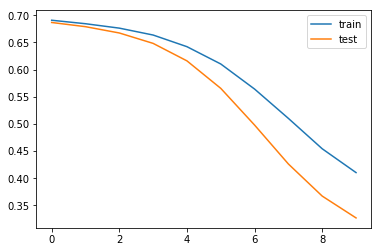

In [267]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_inputs.shape[1], train_inputs.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(train_output.shape[1]))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=2, mode='auto')
# fit network
history = model.fit(train_inputs, train_output, epochs=10, batch_size=10, validation_data=(test_inputs, test_output), verbose=2, shuffle=False, callbacks=[es])
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [268]:
# make a prediction
yhat = model.predict(test_inputs)
yhat.shape

(20, 24)

In [269]:
yhat = yhat.flatten()
for index, num in enumerate(yhat):
    if num < 0.5:
        yhat[index] = 0
    elif num >= 0.5:
        yhat[index] = 1

yhat
test_output = test_output.flatten()

In [275]:
unique, counts = np.unique(yhat, return_counts=True)

np.asarray((unique, counts)).T

array([[  0., 380.],
       [  1., 100.]])

In [270]:
import sklearn
from sklearn.metrics import average_precision_score

CF = sklearn.metrics.confusion_matrix(test_output, yhat)

In [230]:
labs = ['n', 'p']

FP = {}
for r, label in enumerate(labs):
    fp = 0
    for c in range(2):
        if r != c:
            fp += CF[r][c]
        FP[label] = fp


FN = {}
for c, label in enumerate(labs):
    fn = 0
    for r in range(2):
        if c != r:
            fn += CF[r][c]
        FN[label] = fn

TP = {}
for r, label in enumerate(labs):
    for c in range(2):
        if r == c:
            TP[label] = CF[r][c]

results = {'n': {}, 'p': {}}

for lab in labs:
    results[lab]['precision'] = TP[lab] / (TP[lab] + FP[lab])
    results[lab]['recall'] = TP[lab] / (TP[lab] + FN[lab])
    results[lab]['F1'] = 2 * ((results[lab]['precision'] * results[lab]['recall']) / (results[lab]['precision'] + results[lab]['recall']))

print(results)

{'n': {'precision': 0.9329758713136729, 'recall': 0.9157894736842105, 'F1': 0.9243027888446214}, 'p': {'precision': 0.7009345794392523, 'recall': 0.75, 'F1': 0.7246376811594203}}


In [233]:
results = pd.DataFrame()
results['pred'] = yhat
results['true'] = test_output
results['correct'] = (results['pred'] == results['true']).astype(int)

In [234]:
results['correct'].sum()/results['correct'].count()

0.88125

In [276]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.